## Check the splirt data and clustering

In [66]:
import os
os.environ["MPICH_GPU_SUPPORT_ENABLED"] = "0"
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table,join,Column,vstack
from pathlib import Path

import lsstypes as types

In [67]:
sys.path.append('../../scripts/')
import utils_4most as utils
sys.path.append('../')
from helper import SELECT_REGION, ALL_REDSHIFT_BIN, REDSHIFT_BIN_LSS
from plotting_tools import get_namespace
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import pandas as pd
from astropy.table import Table, vstack

COL_ORDER = ["BGS1","LRG1","LRG2","LRG3","ELG1","ELG2","QSO1"]
REGIONS   = ["GCcomb","NGC","SGC","N", "SNGC", "S","noDES","SnoDES"]
# REGIONS   = ["GCcomb","SGC", "SSGC",'DES', "SGCnoDES"]

# Initialize DataFrame
df = pd.DataFrame(index=REGIONS, columns=COL_ORDER, dtype=int)

tracers = ["BGS","LRG","ELG","QSO"]
TRACER_BINS = [(tracer, zrange) 
               for tracer, zranges in REDSHIFT_BIN_LSS.items()
               if tracer in tracers
               for zrange in zranges]
for tracer, zrange in TRACER_BINS:
    col = get_namespace(tracer, zrange)   # should return BGS1, LRG1, etc.
    if col not in COL_ORDER:
        continue
    # Map to DESI filename
    tracer_file = tracer
    if "BGS" in tracer: tracer_file = "BGS_BRIGHT-21.35"
    if "ELG" in tracer: tracer_file = "ELG_LOPnotqso"
    # Read catalogs once
    cat_ngc = Table.read(f"/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/{tracer_file}_NGC_clustering.dat.fits")
    cat_sgc = Table.read(f"/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/{tracer_file}_SGC_clustering.dat.fits")
    cat_all = vstack([cat_ngc, cat_sgc], join_type="exact")
    # Redshift cut
    zmask = (cat_all["Z"] >= zrange[0]) & (cat_all["Z"] <= zrange[1])
    cat_all = cat_all[zmask]
    # Convert RA/DEC to numpy once
    ra  = cat_all["RA"].data
    dec = cat_all["DEC"].data
    # Fill region counts
    df.loc["GCcomb", col] = len(cat_all)
    for region in REGIONS[1:]:
        mask = SELECT_REGION(ra, dec, region=region)
        df.loc[region, col] = int(mask.sum())

In [69]:
df

,BGS1,LRG1,LRG2,LRG3,ELG1,ELG2,QSO1
GCcomb,1192987.0,1051064.0,1612467.0,1801160.0,2739443.0,3800245.0,1447084.0
NGC,840032.0,687912.0,1065694.0,1195706.0,1803029.0,2464580.0,961184.0
SGC,352955.0,363152.0,546773.0,605454.0,936414.0,1335665.0,485900.0
N,347141.0,182211.0,282287.0,308536.0,417320.0,517220.0,299438.0
SNGC,492891.0,505701.0,783407.0,887170.0,1385709.0,1947360.0,661746.0
S,845846.0,868853.0,1330180.0,1492624.0,2322123.0,3283025.0,1147646.0
noDES,1093583.0,940444.0,1448086.0,1614600.0,2392991.0,3306562.0,1305318.0
SnoDES,746442.0,758233.0,1165799.0,1306064.0,1975671.0,2789342.0,1005880.0


In [ ]:
nside = 128
# hpmap = utils.create_hp_map(cat_all['RA'], cat_all['DEC'], nside=nside, weight=cat_all['WEIGHT_FKP'])
# utils.plot_moll(hpmap, mask_dir='/global/homes/s/shengyu/Y3/blinded_data_splits/scripts', des_footprint=True)

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.10/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


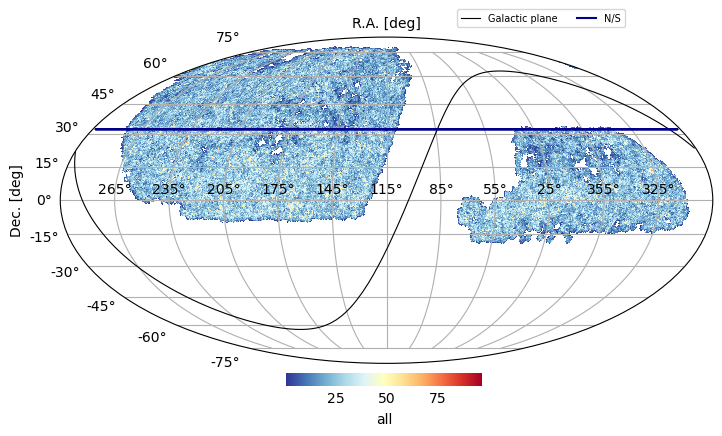

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.10/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


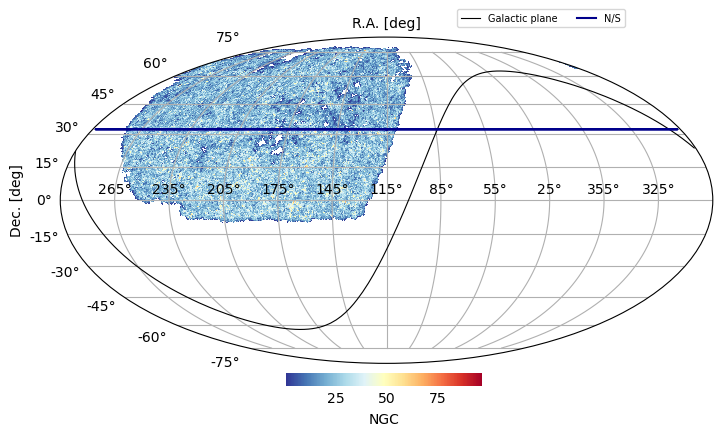

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.10/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


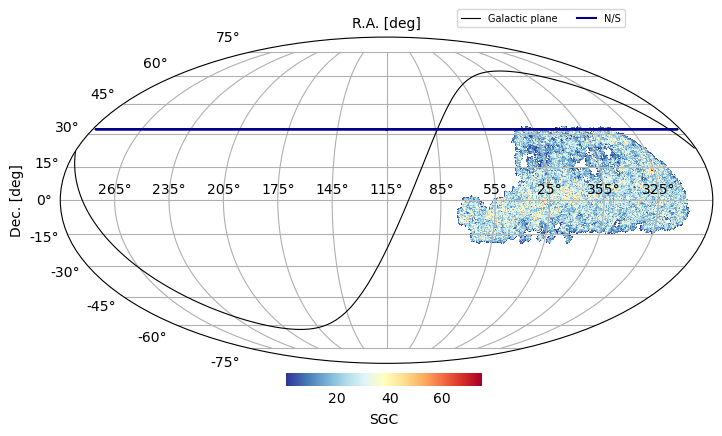

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.10/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


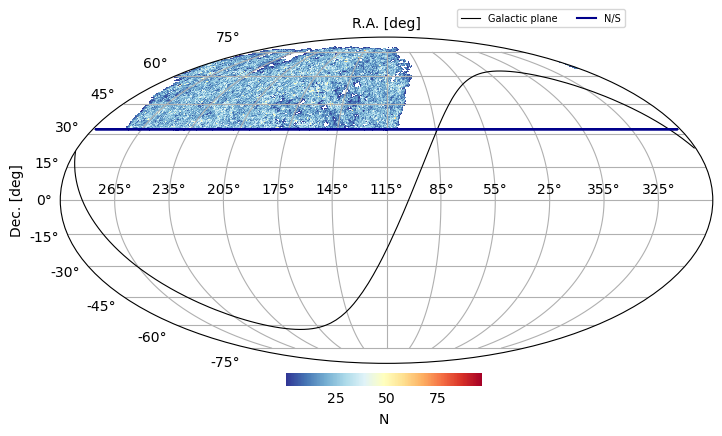

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.10/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


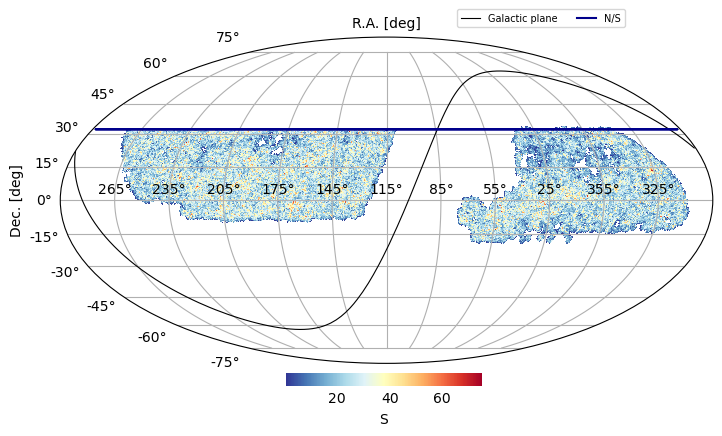

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.10/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


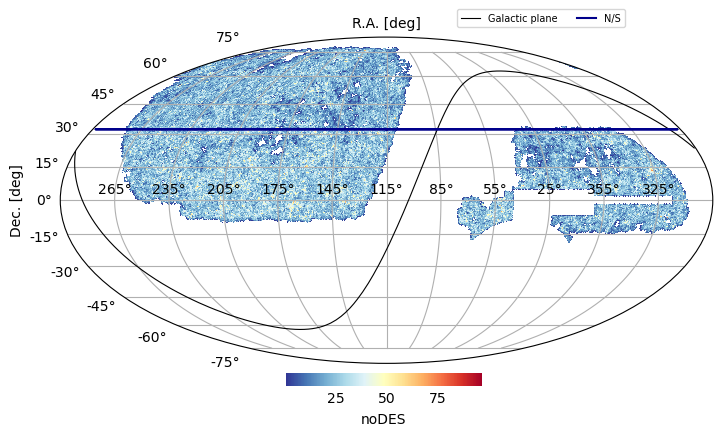

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.10/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


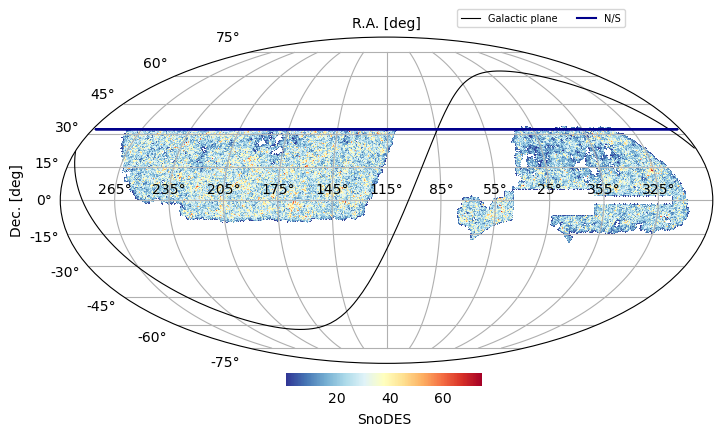

In [21]:
nside = 128

tracer = 'BGS'
if 'BGS' in tracer: tracer = 'BGS_BRIGHT-21.35'
# Read NGC + SGC
cat_ngc = Table.read(f'/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/{tracer}_NGC_clustering.dat.fits')
cat_sgc = Table.read(f'/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/{tracer}_SGC_clustering.dat.fits')

# Combine rows
cat_all = vstack([cat_ngc, cat_sgc], join_type='exact')  # or 'inner' / 'outer' if needed
hpmap = utils.create_hp_map(cat_all['RA'], cat_all['DEC'], nside=nside, weight=cat_all['WEIGHT_FKP'])
utils.plot_moll(hpmap, label='all')

for region in ['NGC', 'SGC' , 'N', 'S', 'noDES', 'SnoDES']:
    mask_re = SELECT_REGION(cat_all['RA'], cat_all['DEC'], region)
    cat_sel = cat_all[mask_re]
    hpmap = utils.create_hp_map(cat_sel['RA'], cat_sel['DEC'], nside=nside, weight=cat_sel['WEIGHT_FKP'])
    utils.plot_moll(hpmap, label=region)

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.10/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))


here2


/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1213: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ax.grid(True)


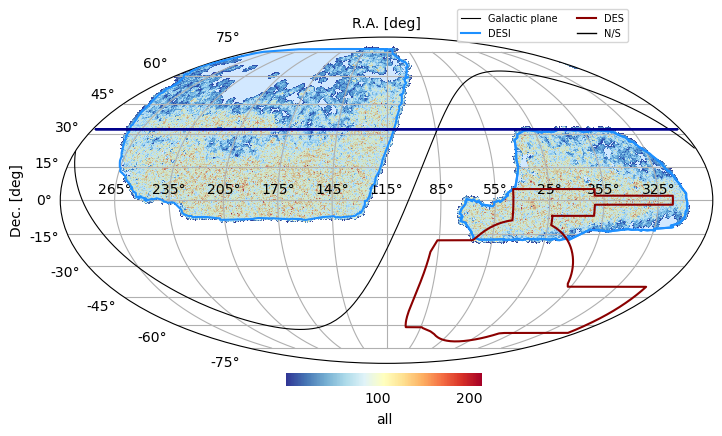

In [65]:
nside = 128

# tracer = 'ELG_LOPnotqso'
tracer = 'LRG'
if 'BGS' in tracer: tracer = 'BGS_BRIGHT-21.35'
# Read NGC + SGC
cat_ngc = Table.read(f'/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/{tracer}_NGC_clustering.dat.fits')
cat_sgc = Table.read(f'/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/{tracer}_SGC_clustering.dat.fits')

# Combine rows
cat_all = vstack([cat_ngc, cat_sgc], join_type='exact')  # or 'inner' / 'outer' if needed
hpmap = utils.create_hp_map(cat_all['RA'], cat_all['DEC'], nside=nside, weight=cat_all['WEIGHT_FKP'])
utils.plot_moll(hpmap,  galactic_plane=True,  des_footprint=True, desi_footprint=True,
                label='all', mask_dir = '/global/homes/s/shengyu/Y3/blinded_data_splits/scripts')


## Effective redshifts

The effect redshift in for DR2 we are considering "summing over the mesh": 

https://github.com/cosmodesi/cai-mock-benchmark/blob/723dc542dc55bd027cf677f770efc04382a37334/dr2/compare_cutsky.py#L164

in a way that is closer to the normalization of the power spectrum = typical amplitude of the window.

In [4]:
region = 'GCcomb'

def get_measurement_fn(kind='mesh2_spectrum_poles', version='dr2-v2', recon=None, tracer='LRG', region='NGC', zrange=(0.8, 1.1), cut=None, auw=None, nran = 18, weight_type='default', **kwargs):
    # base_dir = Path(f'/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/')
    # base_dir = base_dir / (f'blinded_{recon}' if recon else 'blinded')
    base_dir = Path(f'/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/blinded_data/{version}/data_splits')
    if cut: cut = '_thetacut'
    else: cut = ''
    if auw: auw = '_auw'
    else: auw = ''
    return str(base_dir / f'{kind}_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}_{region}_{weight_type}{auw}{cut}_nran{nran}.h5')

def get_effective_redshift(args):
    window = types.read(get_measurement_fn(**args, kind='window_mesh2_spectrum_poles'))
    mono = window.theory.get(ells=0)
    zeff = getattr(mono, "z", mono._meta.get("z", None))
    if zeff is None:
        raise AttributeError(f"No z_eff found in window function")
    print(args, f'{zeff:.3f}', flush=True)
    return zeff

for tracer, zrange in ALL_REDSHIFT_BIN:
    if 'BGS' in tracer: tracer = 'BGS_BRIGHT-21.35'
    if 'ELG' in tracer: tracer = 'ELG_LOPnotqso'
    data_args = {'tracer':tracer, 'zrange':zrange, 'region':region, 'weight_type':'default_fkp'}
    # data, wmatrix, covariance = load_blinded_data_pip(data_args)
    get_effective_redshift(data_args)

{'tracer': 'BGS_BRIGHT-21.35', 'zrange': (0.1, 0.4), 'region': 'GCcomb', 'weight_type': 'default_fkp'} 0.093
{'tracer': 'LRG', 'zrange': (0.4, 0.6), 'region': 'GCcomb', 'weight_type': 'default_fkp'} 0.263
{'tracer': 'LRG', 'zrange': (0.6, 0.8), 'region': 'GCcomb', 'weight_type': 'default_fkp'} 0.501
{'tracer': 'LRG', 'zrange': (0.8, 1.1), 'region': 'GCcomb', 'weight_type': 'default_fkp'} 0.858
{'tracer': 'ELG_LOPnotqso', 'zrange': (0.8, 1.1), 'region': 'GCcomb', 'weight_type': 'default_fkp'} 0.920
{'tracer': 'ELG_LOPnotqso', 'zrange': (1.1, 1.6), 'region': 'GCcomb', 'weight_type': 'default_fkp'} 1.769
{'tracer': 'QSO', 'zrange': (0.8, 2.1), 'region': 'GCcomb', 'weight_type': 'default_fkp'} 2.317


In [70]:
cat_fn = '/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/QSO_0_clustering.ran.fits'

# /dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/LRG_zcmb_NGC_clustering.dat.fits
# LRG_zcmb_NGC_clustering.dat.fits

cat = Table.read(cat_fn)
cat
# np.mean(cat['WEIGHT_FKP'])

TARGETID,RA,DEC,NTILE,PHOTSYS,FRAC_TLOBS_TILES,Z,WEIGHT,WEIGHT_SYS,WEIGHT_COMP,WEIGHT_ZFAIL,TARGETID_DATA
int64,float64,float64,int64,bytes1,float64,float64,float64,float64,float64,float64,int64
327857698848637143,21.699488025847675,-19.375747955151088,1,S,0.9862681744749596,1.3156952666536537,1.1463698022489033,1.0173324346542358,1.0,1.0261170864105225,39627556680374610
327857698848637867,21.690238243910034,-19.396944798604157,1,S,0.9862681744749596,2.8107781995486256,1.0603366547528015,0.948313295841217,1.0,1.0181857347488403,39627426950551408
327857698848639410,21.700090176998838,-19.38118276360509,1,S,0.9862681744749596,1.9228260590891117,1.1382826062353022,0.9903808236122131,1.0,1.0466053485870361,39627814923667547
327857698852831286,21.926750733015158,-19.43096718905237,1,S,0.9862681744749596,1.8828770515074202,1.0522080138686098,0.9581570029258728,1.0,1.0,39627845688891355
327857698852831318,21.833759038382357,-19.434743116116266,1,S,0.9862681744749596,2.749722988058825,1.1641522339776529,1.0132535696029663,1.0,1.0462288856506348,39627766978584816
327857698852831382,21.798969252836027,-19.41231700896676,1,S,0.9862681744749596,1.816335645746041,1.1528113071721537,0.9866998195648193,1.0,1.0639182329177856,39627622551912924
327857698852831488,21.800228797972267,-19.39021323752439,1,S,0.9862681744749596,2.6596178067912506,1.1154230541426178,0.9896407723426819,1.0,1.0263538360595703,39627724754524323
327857698852831533,21.737486248692587,-19.403603169131284,1,S,0.9862681744749596,2.4147343976888758,2.4188337284787473,0.9795196056365967,2.0,1.1243407726287842,39627322701125813
327857698852831582,21.87669927315589,-19.427417103488597,1,S,0.9862681744749596,1.748424025449864,1.1273937808944037,1.0120420455932617,1.0,1.0144068002700806,39636199668716902


In [75]:
import fitsio
ran_hdr = fitsio.read_header(cat_fn, ext=1)
ran_hdr
area = ran_hdr["NAXIS2"] / 2500.  # deg^2
area

11171.9876

In [26]:
cat_fn = '/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/QSO_NGC_clustering.dat.fits'

cat = Table.read(cat_fn)

np.mean(cat['WEIGHT_FKP'])

np.float64(0.8684883448977905)

In [2]:
def load_mesh2_spectrum_poles(filename):
    result = types.read(filename)
    k = result.get(ells=0).coords('k')
    Pk = {ell: result.get(ells=ell).values() for ell in result.ells}
    return k, Pk

In [ ]:
fn =  '/pscratch/sd/s/shengyu/Y3/blinded/test/window_mesh2_spectrum_poles_LRG_z0.4-0.6_GCcomb_default_fkp.h5'

result = types.read(fn)

zeff = 0
for pole in result.theory: zeff += pole._meta['z']


0.5096525952978979

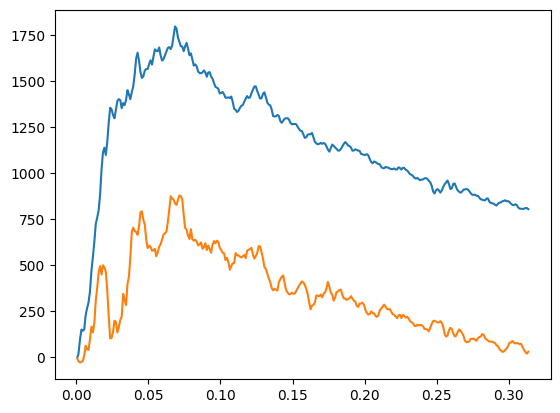

In [3]:
fn =  '/pscratch/sd/s/shengyu/Y3/blinded/test/mesh2_spectrum_poles_LRG_z0.4-0.6_NGC_default_fkp.h5'

k, Pk = load_mesh2_spectrum_poles(fn)

for ell in [0,2]:
    plt.plot(k,k*Pk[ell]['value'])

In [ ]:

def get_measurement_fn(kind='mesh2_spectrum_poles', version='test', recon=None, tracer='LRG', region='NGC', zrange=(0.8, 1.1), cut=None, auw=None, weight_type='default_fkp', **kwargs):
    # base_dir = Path(f'/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/')
    base_dir = Path('/pscratch/sd/s/shengyu/Y3/')
    base_dir = base_dir / (f'blinded_{recon}' if recon else 'blinded')
    if cut: cut = '_thetacut'
    else: cut = ''
    if auw: auw = '_auw'
    else: auw = ''
    return str(base_dir / f'{version}/{kind}_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}_{region}_{weight_type}{auw}{cut}.h5')


(kmin, kmax, kbin, lenk) = load_bins('pk', 'y3_blinding')

data = types.read(get_measurement_fn(**data_args, kind='mesh2_spectrum_poles')) 
window = types.read(get_measurement_fn(**data_args, kind='window_mesh2_spectrum_poles')) 
covariance = types.read(get_measurement_fn(**data_args, kind='covariance_mesh2_spectrum_poles')) 

ells = [0,2]
sl = slice(0, None, 5)  # rebin to dk = 0.005 h/Mpc
oklim = (0.02, 0.2)  # fitted k-range, no need to go to higher k
mean = data.select(k=sl).select(k=oklim).get(ells)
wmatrix = window.at.observable.match(mean).at.theory.match(data.select(k=(0., 1.1 * oklim[1])).get(ells))
covariance = covariance.at.observable.match(mean)

In [61]:
from blinded_data_pip import get_catalog_fn, get_clustering_positions_weights

catalog_args = dict(version='dr2-v2', region='NGC', tracer='LRG', zrange=(0.4,0.6), weight_type='defaul_fkp', nran=18)

region = 'N'
if region in ['NGC','SGC']:
    data_fn = get_catalog_fn(kind='data', **catalog_args)
    all_randoms_fn = get_catalog_fn(kind='randoms', **catalog_args)
elif region in ['N', 'S', 'noDES', 'SnoDES']:
    data_fn = [fn for cap in ['NGC', 'SGC'] for fn in get_catalog_fn(kind='data', **(catalog_args | {'region': cap}))]
    all_randoms_fn = [fn for cap in ['NGC', 'SGC'] for fn in get_catalog_fn(kind='randoms', **(catalog_args | {'region': cap}))]

In [62]:
pos = get_clustering_positions_weights(*data_fn, kind='data', **catalog_args)

ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.